In [3]:
import xarray as xr
import numpy as np
import pandas as pd

import os

from snobedo.lib.dask_utils import start_cluster, client_ip_and_port
from snobedo.snotel import SnotelLocations, CsvParser

from common import SHARED_STORE, SNOBAL_DIR, SNOTEL_DIR, DATA_DIR, COARSEN_OPTS, HV_PLOT_OPTS

In [2]:
client = start_cluster(8, 24)
client_ip_and_port(client)

10.242.76.197:8787


In [ ]:
# Parameters
#    ['HGT', 'TMP', 'RH', 'UGRD', 'VGRD', 'APCP06', 'APCP01', 'TCDC', 'TCDC', 'DSWRF', 'VBDSF', 'VDDSF']
# Geopotential height [gpm]
# Temperature [C]
# Relative humidity [%]
# u-component of wind [m/s]
# v-component of wind [m/s]
# 06 hr Total precipitation [kg/(m^2)]
# 01 hr Total precipitation [kg/(m^2)]
# Total cloud cover [%]
# Total cloud cover [%]
# Downward short-wave radiation flux [W/(m^2)]
# Visible Beam Downward Solar Flux [W/(m^2)]
# Visible Diffuse Downward Solar Flux [W/(m^2)]

In [12]:
os.path.exists('/uufs/chpc.utah.edu/common/home/uvu-group1/olson/snow-data/HRRR/hrrr.20210401/hrrr.t18z.wrfsfcf06.grib2')

True

In [14]:
hrrr_img = '/uufs/chpc.utah.edu/common/home/uvu-group1/olson/snow-data/HRRR/hrrr.20210401/hrrr.t18z.wrfsfcf06.grib2' # 11 AM

hrrr_smrf_xr = xr.open_mfdataset(hrrr_img, filter_by_keys={'typeOfLevel': 'surface'})
hrrr_smrf_xr.vbdsf

Can't create file '/uufs/chpc.utah.edu/common/home/uvu-group1/olson/snow-data/HRRR/hrrr.20210401/hrrr.t18z.wrfsfcf06.grib2.5b7b6.idx'
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1037042/software/pkg/miniconda3/envs/snow_viz/lib/python3.12/site-packages/cfgrib/messages.py", line 537, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/uufs/chpc.utah.edu/common/home/u1037042/software/pkg/miniconda3/envs/snow_viz/lib/python3.12/contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1037042/software/pkg/miniconda3/envs/snow_viz/lib/python3.12/site-packages/cfgrib/messages.py", line 503, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
PermissionError: [Errno 13] Permission denied: '/uufs/chpc.utah.edu/common/home/uvu-group1/olson/sno

<xarray.DataArray 'vbdsf' (y: 314, x: 226)> Size: 284kB
dask.array<open_dataset-vbdsf, shape=(314, 226), dtype=float32, chunksize=(314, 226), chunktype=numpy.ndarray>
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    (y, x) float64 568kB dask.array<chunksize=(314, 226), meta=np.ndarray>
    longitude   (y, x) float64 568kB dask.array<chunksize=(314, 226), meta=np.ndarray>
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Attributes: (12/34)
    GRIB_paramId:                             260346
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      70964
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Visible Beam Downward Solar Flux
    GRIB_shortName:                           vbdsf
    GRIB_units:                               W m**-2
    long_name:                                Visible Beam Downward Solar Flux
    units:                                    W m**-2
    standard_name:                            unknown

Can't create file '/uufs/chpc.utah.edu/common/home/uvu-group1/olson/snow-data/HRRR/hrrr.20210401/hrrr.t18z.wrfsfcf06.grib2.19e34.idx'
Traceback (most recent call last):
  File "/uufs/chpc.utah.edu/common/home/u1037042/software/pkg/miniconda3/envs/snow_viz/lib/python3.12/site-packages/cfgrib/messages.py", line 537, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/uufs/chpc.utah.edu/common/home/u1037042/software/pkg/miniconda3/envs/snow_viz/lib/python3.12/contextlib.py", line 137, in __enter__
    return next(self.gen)
           ^^^^^^^^^^^^^^
  File "/uufs/chpc.utah.edu/common/home/u1037042/software/pkg/miniconda3/envs/snow_viz/lib/python3.12/site-packages/cfgrib/messages.py", line 503, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
PermissionError: [Errno 13] Permission denied: '/uufs/chpc.utah.edu/common/home/uvu-group1/olson/sno

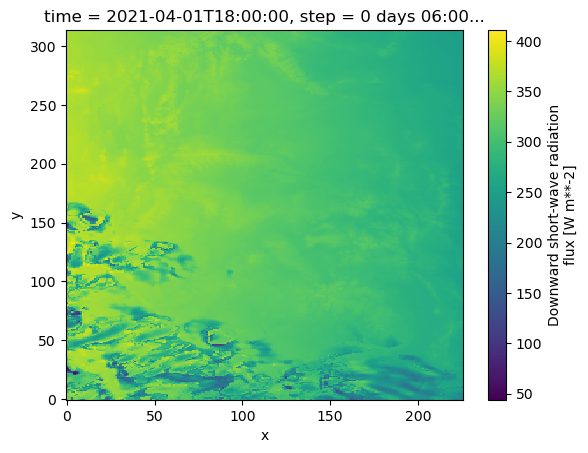

In [15]:
xx = xr.open_dataset('/uufs/chpc.utah.edu/common/home/uvu-group1/olson/snow-data/HRRR/hrrr.20210401/hrrr.t18z.wrfsfcf06.grib2', 
    filter_by_keys={ 'level': 0, 'stepType': 'instant', 'cfVarName': 'dswrf', 'typeOfLevel': 'surface'}, 
    engine="cfgrib")
xx.dswrf.plot()

In [ ]:
HRRR_solar = xr.open_mfdataset(
    f'{SHARED_STORE}/erw_isnobal/{water_year}/erw_hrrr_solar/run*/net_solar.nc',
    parallel=True, chunks={'time': 24}, # 'y' :10, 'x': 10},
    drop_variables=['DSWRF', 'illumination_angle', 'zenith', 'azimuth', 'albedo_vis', 'albedo_ir'],
)